# Exercise e) of project 1

## preliminaries

In [62]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error,  r2_score


def FrankeFunction(x,y, noise=0):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4 + noise*np.random.normal(0, 1, (n,n))

''' generate design matrix without intercept column for flattend x1, x2 '''
def design_no_in(x1f, x2f, degreeplus1):
    n = x1m.size
    # 1. setting up design matrix
    # we work here with intercept column
    # the designmatrix s.t. we have the features 1, x1, x2, x1x2, x1^2, x2^2, ....
    # with max totaldegree 5
    # number of possible monoms up to degree 5 for 2 variables is 2+5 choose 5
    num_of_monoms = scipy.special.binom(degreeplus1 + 1, degreeplus1 -1)
    X = np.zeros((n, int(num_of_monoms))) # afterwards the intercept column is removed
    c = 0
    for i in range(degreeplus1):
        for j in range(degreeplus1 - i):
            X[:,c] = x1f**i * x2f**j
            #print('{} {}'.format(i,j))
            #print(X[:,c])
            #print('x_1^{} * x_2^{}'.format(i,j)) 
            c += 1
    # remove now intercept column
    X = X[:,1:]
    return X
    


'''
generate data for meshgrid (x1m, x2m) and according y. degree is the maximum degree of the
polynomial represented by the designmatrix
'''
def data(degree, x1m, x2m, y):
    degreeplus1 = degree + 1

    x1m_flat = x1m.flatten()
    x2m_flat = x2m.flatten()
    
    X = design_no_in(x1m_flat, x2m_flat, degreeplus1)
    
    # 2. split the data in test and training data
    X_train, X_test, y_train, y_test = train_test_split(X, y.flatten())
 
    # 3. scaling of training data (by subtracting the mean value of each column)
    X_train_mean = np.mean(X_train, axis=0)
    X_train_scaled = X_train  - X_train_mean

    y_train_mean = np.mean(y_train)
    y_train_scaled = y_train - y_train_mean

    # in order to use beta for test → test has to be scaled by training means
    X_test_scaled = X_test - X_train_mean
    #X_test_scaled = X_test - X_train_mean
    y_test_scaled = y_test - y_train_mean

    return X, X_train, X_test, X_train_scaled, X_train_mean, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test
    
def OLS_analysis(maxdegree):
    degrees = np.arange(1,maxdegree + 1)
    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

    betas = np.zeros((maxdegree, num_monoms)) # for maxdegree = 5: 7 choose 5 is the number of possible monoms up to degree 5 for 2 variables (not -1 because the intercept will be added)
    MSE = np.zeros((maxdegree,2)) # 0.column for train, 1. for test
    R2 = np.zeros((maxdegree,2))
    for degree in degrees:
        #print('DEGREE = ' + str(degree))
        X, X_train, X_test, X_train_scaled, X_train_mean, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test = data(degree, x1m, x2m, y)
        
        beta_lin = np.linalg.inv(X_train_scaled.T @ X_train_scaled) @ X_train_scaled.T @ y_train_scaled # without intercept
        intercept = y_train_mean - X_train_mean @ beta_lin
        betas[degree-1] = np.hstack([intercept, beta_lin, np.zeros(( num_monoms -1 - beta_lin.size,))])
    
        #print('beta = {}'.format(betas[degree-1]))
        
        ypredict_train_LR =  X_train_scaled @ beta_lin + y_train_mean
        ypredict_test_LR = X_test_scaled @ beta_lin + y_train_mean
        ypredict_all_LR = X @ beta_lin + y_train_mean
        MSE[degree-1, 0] = mean_squared_error(y_train, ypredict_train_LR)
        MSE[degree-1, 1] = mean_squared_error(y_test, ypredict_test_LR)
        R2[degree-1, 0] = r2_score(y_train, ypredict_train_LR)
        R2[degree-1, 1] = r2_score(y_test, ypredict_test_LR)
    return MSE, R2, betas, degrees


In [ ]:
np.random.seed(0)
n = 100
x1 = np.linspace(0, 1, n)
x2 = np.linspace(0, 1, n)
x1m, x2m = np.meshgrid(x1,x2)

y = FrankeFunction(x1m,x2m,0.01) # row ~ x2, column ~ x1

## solutions

trying to recreate figure 2.11:
As don't achieve typical shape for maximum polynomial degree up to 5, also consider higher degrees

In [67]:
MSE, R2, betas, degrees = OLS_analysis(12)

[Text(0.5, 0, 'maximum degree'), Text(0, 0.5, '$MSE$')]

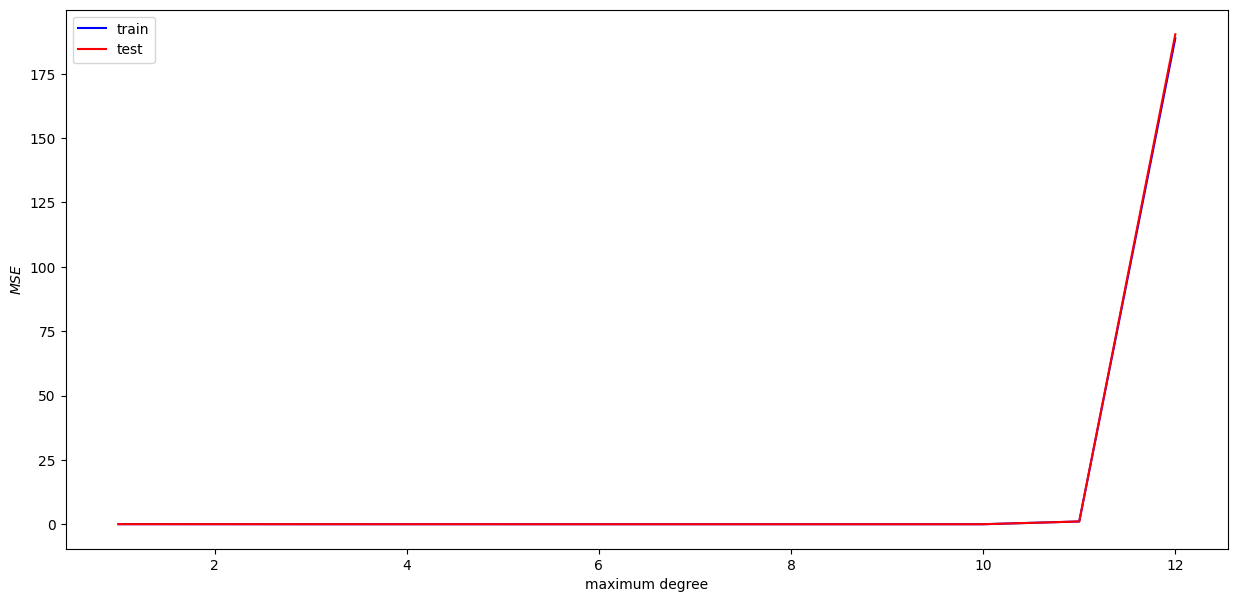

In [68]:
# plot MSE for train, test 
plt.figure(figsize=(15, 7))
axs = plt.gca()

#axs.plot(degrees[:-1],MSE[:-1,0], 'b', label=r'train')
#axs.plot(degrees[:-1],MSE[:-1,1], 'r', label=r'test')

axs.plot(degrees,MSE[:,0], 'b', label=r'train')
axs.plot(degrees,MSE[:,1], 'r', label=r'test')

axs.legend()
axs.set(xlabel =r'maximum degree', ylabel= r'$MSE$')

NOT WHAT WE WANTED :/// → THE MSE for train does not stay low for larger maximum degree

Now try the bias-varaince- decompostioin with bootstrap

In [69]:





def OLS_analysis_bootstrap(maxdegree):
    degrees = np.arange(1,maxdegree + 1)

    n_boostraps = 100

    ERROR  = np.zeros((maxdegree,2))
    VAR  = np.zeros((maxdegree,2))
    BIAS = np.zeros((maxdegree,2))
        
    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

    betas = np.zeros((maxdegree, num_monoms)) # for maxdegree = 5: 7 choose 5 is the number of possible monoms up to degree 5 for 2 variables (not -1 because the intercept will be added)
    MSE = np.zeros((maxdegree,2)) # 0.column for train, 1. for test
    R2 = np.zeros((maxdegree,2))
    for degree in degrees:
        print('DEGREE = ' + str(degree))
        degreeplus1 = degree + 1
        X = design_no_in(x1m.flatten(), x2m.flatten(), degreeplus1)

        X_train, X_test, y_train, y_test = train_test_split(X, y.flatten(), test_size=0.2,random_state=20)

        y_pred = np.empty((y_test.shape[0], n_boostraps))
        for i in range(n_boostraps):
            X_t, y_t = resample(X_train, y_train)
            
            X_t_mean = np.mean(X_t, axis=0)
            X_t_scaled = X_t  - X_t_mean
        
            y_t_mean = np.mean(y_t)
            y_t_scaled = y_t - y_t_mean
        
            # in order to use beta for test → test has to be scaled by training means
            X_test_scaled_t = X_test - X_t_mean
            

            

            beta_lin = np.linalg.pinv(X_t_scaled.T @ X_t_scaled) @ X_t_scaled.T @ y_t_scaled # without intercept
            #ypredict_train_LR =  X_train_scaled @ beta_lin + y_train_mean
            y_pred[:,i] = X_test_scaled_t @ beta_lin + y_t_mean
            
            #print('beta = {}'.format(betas[degree-1]))
        y_test_reshaped = y_test.reshape(y_test.shape[0],1)

        error = np.mean( np.mean((y_test_reshaped - y_pred)**2, axis=1, keepdims=True) )
        ERROR[degree -1, 1] = error
        bias = np.mean( (y_test_reshaped - np.mean(y_pred, axis=1, keepdims=True))**2 )
        BIAS[degree -1, 1] = bias
        variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
        #variance = np.mean( np.var(y_test_reshaped, axis=1, keepdims=True) )
        VAR[degree -1, 1] = variance
        print('Error:', error)
        print('Bias^2:', bias)
        print('Var:', variance)
        print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

    return ERROR, BIAS, VAR, degrees


ERROR, BIAS, VAR, degrees = OLS_analysis_bootstrap(17)

DEGREE = 1
Error: 0.022405587611582848
Bias^2: 0.022393924756856046
Var: 1.1662854726805213e-05
0.022405587611582848 >= 0.022393924756856046 + 1.1662854726805213e-05 = 0.02240558761158285
DEGREE = 2
Error: 0.016941112178899962
Bias^2: 0.016927855495742515
Var: 1.3256683157446694e-05
0.016941112178899962 >= 0.016927855495742515 + 1.3256683157446694e-05 = 0.016941112178899962
DEGREE = 3
Error: 0.007793322703306924
Bias^2: 0.007783424263758885
Var: 9.89843954803799e-06
0.007793322703306924 >= 0.007783424263758885 + 9.89843954803799e-06 = 0.007793322703306923
DEGREE = 4
Error: 0.004125763482870547
Bias^2: 0.004116932907534396
Var: 8.830575336150344e-06
0.004125763482870547 >= 0.004116932907534396 + 8.830575336150344e-06 = 0.004125763482870547
DEGREE = 5
Error: 0.0022380461715278974
Bias^2: 0.0022306363099257377
Var: 7.409861602159907e-06
0.0022380461715278974 >= 0.0022306363099257377 + 7.409861602159907e-06 = 0.0022380461715278974
DEGREE = 6
Error: 0.0012570927685716328
Bias^2: 0.001250620

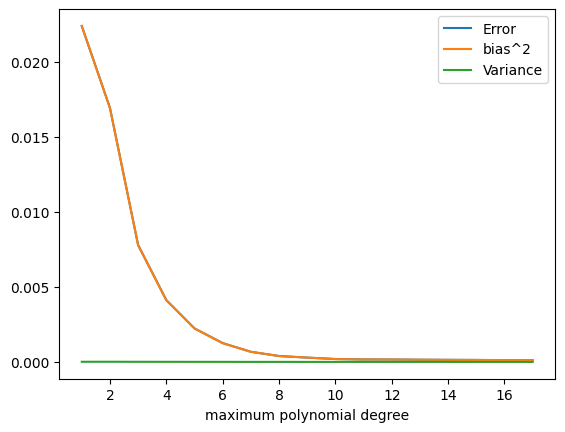

In [71]:
plt.plot(degrees, ERROR[:,1], label='Error')
plt.plot(degrees, BIAS[:,1], label='bias^2')
plt.plot(degrees, VAR[:,1], label='Variance')
plt.xlabel('maximum polynomial degree')
plt.legend()
plt.show()

Repeat THIS for X with intercept column !!! and with splitting outside the degrees loop: → no change still

In [72]:
from sklearn.pipeline import make_pipeline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
import scipy


def design_with_in(x1f, x2f, degreeplus1):
    n = x1f.size
    num_of_monoms = scipy.special.binom(degreeplus1 + 1, degreeplus1 -1)
    X = np.zeros((n, int(num_of_monoms)))
    c = 0
    for i in range(degreeplus1):
        for j in range(degreeplus1 - i):
            X[:,c] = x1f**i * x2f**j
            #print('{} {}'.format(i,j))
            #print(X[:,c])
            #print('x_1^{} * x_2^{}'.format(i,j)) 
            c += 1
    return X



def OLS_analysis_bootstrap(maxdegree):
    degrees = np.arange(1,maxdegree + 1)

    n_boostraps = 150

    ERROR  = np.zeros(maxdegree)
    VAR  = np.zeros(maxdegree)
    BIAS = np.zeros(maxdegree)
        
    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

    x = np.array([x1m.flatten(), x2m.flatten()]).T

    x_train, x_test, y_train, y_test = train_test_split(x, y.flatten())#, test_size=0.25)

    for degree in degrees:
        print('DEGREE = ' + str(degree))
        degreeplus1 = degree + 1

        x1f = x_train[:,0]
        x2f = x_train[:,1]
        X_train = design_with_in(x1f, x2f, degreeplus1)


        x1f = x_test[:,0]
        x2f = x_test[:,1]
        X_test = design_with_in(x1f, x2f, degreeplus1)

        y_test_reshaped = y_test.reshape(y_test.shape[0],1)
        y_pred = np.empty((y_test.shape[0], n_boostraps))
        for i in range(n_boostraps):
            X_t, y_t = resample(X_train, y_train,replace=True)

            beta_lin = np.linalg.pinv(X_t.T @ X_t) @ X_t.T @ y_t # without intercept
            y_pred[:,i] = X_test @ beta_lin 

            #print(mses[-1])
            
            
            #print('beta = {}'.format(betas[degree-1]))
        
        error = np.mean(np.mean((y_test_reshaped - y_pred)**2, axis=0, keepdims=True)) 
        '''
        error = np.mean( np.mean((y_test_reshaped - y_pred)**2, axis=1, keepdims=True) )
        
        
        mse = []
        for i in range(n_boostraps):
            mse.append(mean_squared_error(y_test, y_pred[:,i]))
        error = np.mean(mse)
        '''
        
        ERROR[degree -1] = error
        biass = np.mean( (y_test_reshaped - np.mean(y_pred, axis=1, keepdims=True))**2 )
        #biass = bias(y_test_reshaped, y_pred)
        
        BIAS[degree -1] = biass

        variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )

        VAR[degree -1] = variance
        print('Error:', ERROR[degree -1])
        print('Bias^2:', biass)
        print('Var:', variance)
        print('{} >= {} + {} = {}'.format(ERROR[degree -1], biass, variance, biass+variance))

    return ERROR, BIAS, VAR, degrees


ERROR, BIAS, VAR, degrees = OLS_analysis_bootstrap(10)

DEGREE = 1
Error: 0.023653707488953676
Bias^2: 0.02364339526034273
Var: 1.0312228610941901e-05
0.023653707488953676 >= 0.02364339526034273 + 1.0312228610941901e-05 = 0.023653707488953672
DEGREE = 2
Error: 0.01709282968585197
Bias^2: 0.017079671361032615
Var: 1.3158324819353318e-05
0.01709282968585197 >= 0.017079671361032615 + 1.3158324819353318e-05 = 0.01709282968585197
DEGREE = 3
Error: 0.007912685106412451
Bias^2: 0.007902377757588175
Var: 1.0307348824276026e-05
0.007912685106412451 >= 0.007902377757588175 + 1.0307348824276026e-05 = 0.007912685106412451
DEGREE = 4
Error: 0.004180812398453956
Bias^2: 0.004170502036358238
Var: 1.0310362095719144e-05
0.004180812398453956 >= 0.004170502036358238 + 1.0310362095719144e-05 = 0.004180812398453957
DEGREE = 5
Error: 0.002233013299616238
Bias^2: 0.002224635749117626
Var: 8.377550498611583e-06
0.002233013299616238 >= 0.002224635749117626 + 8.377550498611583e-06 = 0.0022330132996162375
DEGREE = 6
Error: 0.0012891997104475395
Bias^2: 0.00128278014

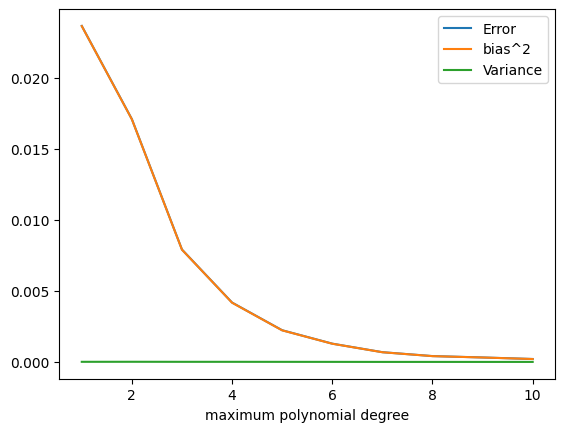

In [73]:
plt.plot(degrees, ERROR[:], label='Error')
plt.plot(degrees, BIAS[:], label='bias^2')
plt.plot(degrees, VAR[:], label='Variance')
plt.xlabel('maximum polynomial degree')
plt.legend()
plt.show()